In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [208]:
# Read in csv file. 
# using sep because of whitespace in column names, Skipping first 6 rows
df = pd.read_csv("2021_01_22_202641_PowerMaster_ShockVibe.csv",sep=r'\s*,\s*', engine='python',skiprows = 6)

#Removing last column because it has NA values
df.drop(df.columns[[-1,]], axis=1, inplace=True)
print(df.isnull().sum())
df.info()

#Recorded     0
Date-Time     0
CRC           0
objectId      0
jobID         0
runNum        0
dataLen       0
XYVibe       58
XYPeak       58
XYShock       0
ZVib         60
ZPeak        60
ZShock        0
ZVibeFlg      0
ZShkFlg       0
XYVibeFlg     0
XYShkFlg      0
PackedVib     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   #Recorded  4141 non-null   int64  
 1   Date-Time  4141 non-null   object 
 2   CRC        4141 non-null   int64  
 3   objectId   4141 non-null   int64  
 4   jobID      4141 non-null   int64  
 5   runNum     4141 non-null   int64  
 6   dataLen    4141 non-null   int64  
 7   XYVibe     4083 non-null   float64
 8   XYPeak     4083 non-null   float64
 9   XYShock    4141 non-null   int64  
 10  ZVib       4081 non-null   float64
 11  ZPeak      4081 non-null   float64
 12  ZShock     4141 non-null   

In [209]:
# To Do: remove NaN's
df.dropna(inplace=True)

print(df)
df.info()

      #Recorded            Date-Time    CRC  objectId  jobID  runNum  dataLen  \
0             0  1970/01/01 00:04:48  39319         3      0       0       25   
1             1  1970/01/01 00:04:48   2474         3      0       0       25   
2             2  1970/01/01 00:04:48  22755         3      0       0       25   
3             3  1970/01/01 00:04:48  58766         3      0       0       25   
4             4  1970/01/01 00:04:48  12824         3      0       0       25   
...         ...                  ...    ...       ...    ...     ...      ...   
4136       4136  2021/01/22 20:21:36  26031         3      0       0       25   
4137       4137  2021/01/22 20:22:06  15005         3      0       0       25   
4138       4138  2021/01/22 20:22:36   4507         3      0       0       25   
4139       4139  2021/01/22 20:23:06  10277         3      0       0       25   
4140       4140  2021/01/22 20:26:18  56322         3      0       0       25   

        XYVibe    XYPeak  X

In [210]:
#Checking if all NaN's are removed. 
df.isnull().sum()
df['Date-Time']

0       1970/01/01 00:04:48
1       1970/01/01 00:04:48
2       1970/01/01 00:04:48
3       1970/01/01 00:04:48
4       1970/01/01 00:04:48
               ...         
4136    2021/01/22 20:21:36
4137    2021/01/22 20:22:06
4138    2021/01/22 20:22:36
4139    2021/01/22 20:23:06
4140    2021/01/22 20:26:18
Name: Date-Time, Length: 4081, dtype: object

In [211]:
# Converting 'Date-Time' Col to a datetime object. 
df['Date-Time'] = pd.to_datetime(df['Date-Time'], format = "%Y/%m/%d %H:%M:%S")


In [212]:
# Set date-time as index - this is to make it easier to .loc or .iloc
df = df.set_index(['Date-Time'])


In [216]:
# Ex. of gettinng between date and time
#df.loc['2021/01/21 09:45:43' : '2021/01/21 09:50:12']
start_time = '9:44:00'
end_time = '10:00:00'
start_date = '2021/01/21'
end_date = '2021/01/21'

df.between_time(start_time,end_time)

# Have to use sort_index() b/c if not, then it raises an error about future deprecation
time_chosen_df = df.sort_index().loc[start_date:end_date].between_time(start_time,end_time)
xyvibe = time_chosen_df['XYVibe'].values
zvib = time_chosen_df['ZVib'].values


[0.7360257 0.734207  0.7299864 0.7281172 0.7285073 0.7290444 0.7281373
 0.7391071 0.7216304 0.7181147 0.7232201 0.7144473 0.7161593 0.716893
 0.7171137 0.7156371 0.7160633 0.7150729 0.7151142 0.7178897 0.7152969
 0.7209173 0.720996  0.7292974 0.7155564 0.7290498 0.7210698 0.7273653
 0.7240004 0.722676  0.7225519]


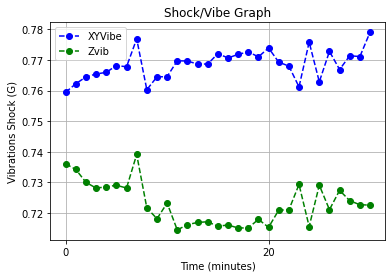

In [221]:
# matplotlib graphing
%matplotlib inline

# 150 is maximum amount of minutes needed within the time period.

# Graph attributes
x_ticks = np.arange(0,151,20)
plt.xticks(x_ticks)
plt.title('Shock/Vibe Graph')
plt.xlabel('Time (minutes)')
plt.ylabel('Vibrations Shock (G)')
plt.grid(True)

# XYVibe
plt.plot(xyvibe,'bo--', label='XYVibe')

# Zvib
plt.plot(zvib,'go--',label='Zvib')

plt.legend()
plt.show()

In [196]:
# To do: Convert string input from user to date time
